In [8]:
# Importing computational packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 200)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import pie, axis, show

# Importing model building packages
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier, plot_importance
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report


import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [9]:
df_port = pd.read_csv('student-por-sep.csv')
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [10]:
# Import Dataset
df_mat = pd.read_csv('student-mat-sep.csv')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [11]:
df = pd.concat([df_mat,df_port],axis = 0)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
# Dataset check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [14]:
df['absences'].value_counts(dropna=False,ascending = True)

28      1
23      1
40      1
38      1
19      1
75      1
17      1
56      1
54      1
32      1
25      1
26      2
24      2
30      2
21      3
20      4
13      4
15      5
22      5
11      8
18      8
9      10
7      10
1      15
3      15
16     17
5      17
14     20
12     24
10     38
8      64
6      80
4     146
2     175
0     359
Name: absences, dtype: int64

In [15]:
# Null check
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [16]:
df.shape

(1044, 33)

In [17]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

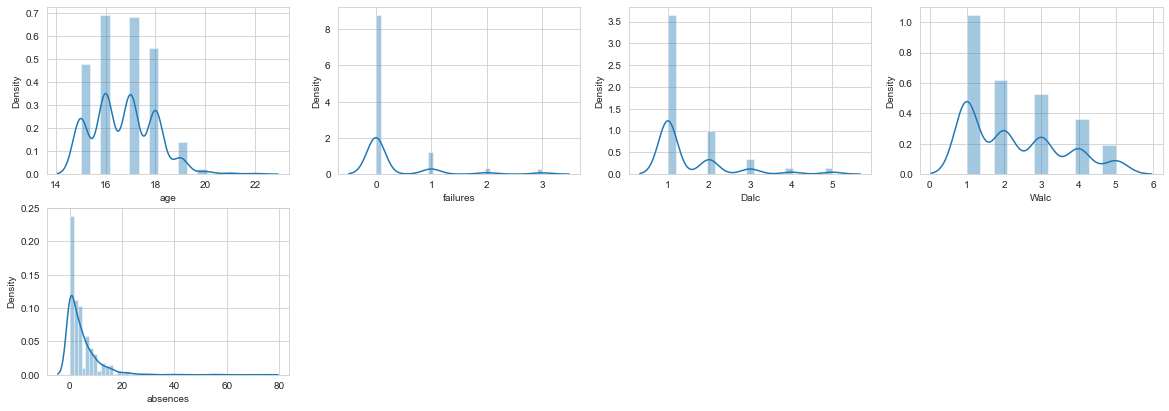

In [19]:
# plot the histogram of a variable from the dataset to see the skewness

var = ['age', 'failures', 'Dalc', 'Walc', 'absences']

plt.figure(figsize=(20,40))
i=0
for col in var:
    i += 1
    plt.subplot(11,4, i)
    sns.distplot(df[col])

plt.show()

In [20]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [21]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [22]:
df_cat.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [23]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_cat, drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df , dummy1], axis=1)

In [24]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


In [25]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
df = df.drop(list(df_cat.columns), axis=1)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


In [26]:
df.loc[df['absences'] <= 0, 'abscent_1'] = 0
df.loc[df['absences'] > 0, 'abscent_1'] = 1
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,abscent_1
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1.0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1.0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,1.0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,1.0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1.0


In [27]:
y = df['abscent_1']#class variable
X = df.drop(labels=['absences','abscent_1'], axis=1)

In [28]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,5,6,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,5,5,6,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,7,8,10,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,15,14,15,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,6,10,10,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=42, test_size=0.2, shuffle=True, stratify = y)

In [30]:
# Scaling the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
var = ['age','Medu','Fedu','traveltime','studytime','failures','freetime','famrel','goout','Dalc','Walc','health',
       'G1','G2','G3']

scaler = StandardScaler()

# Scaling the train data
X_train[var] = scaler.fit_transform(X_train[var])

# Transforming the test data
X_test[var] = scaler.transform(X_test[var])

In [31]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
587,-0.592981,1.228282,-0.353462,-0.695494,-1.174713,-0.390987,0.076346,-0.205052,-0.138298,1.638634,1.325320,-0.372643,-0.427076,-0.706085,-0.121804,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,1,1,1
607,0.225431,1.228282,1.468393,0.687214,-1.174713,1.186182,0.076346,-1.161577,0.717099,0.550122,0.552525,-1.071871,0.896147,1.109872,1.192230,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,0
698,0.225431,0.339534,0.557466,-0.695494,1.208969,-0.390987,-0.986130,-1.161577,-0.138298,-0.538390,-0.993065,0.326586,1.226952,0.201894,0.403810,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
19,-0.592981,1.228282,0.557466,-0.695494,-1.174713,-0.390987,-0.986130,-2.118102,-0.138298,-0.538390,0.552525,1.025814,-1.088687,-0.403425,-0.384611,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0
506,-0.592981,0.339534,0.557466,-0.695494,1.208969,-0.390987,0.076346,-2.118102,-0.993694,-0.538390,-0.993065,-1.071871,-0.096270,-0.100766,-0.121804,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0


In [32]:
# AUC_ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [33]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [34]:
y_train_pred = svclassifier.predict(X_train)
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.17      0.29       287
         1.0       0.69      0.98      0.81       548

    accuracy                           0.71       835
   macro avg       0.77      0.58      0.55       835
weighted avg       0.75      0.71      0.63       835



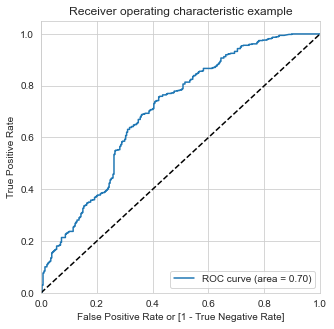

In [35]:
# Predicted probability
y_train_pred_proba_svm = svclassifier.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_svm)

In [36]:
# Predictions on the test set
y_test_pred = svclassifier.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.19      0.31        72
         1.0       0.69      0.96      0.81       137

    accuracy                           0.70       209
   macro avg       0.72      0.58      0.56       209
weighted avg       0.71      0.70      0.64       209



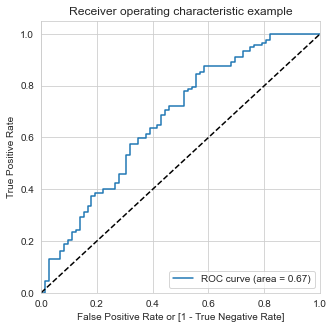

In [37]:
# Predicted probability
y_test_pred_proba = svclassifier.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [38]:
y_train_pred_final = pd.DataFrame({'abscent_1':y_train.values, 'Absent_Prob':y_train_pred_proba_svm})
y_train_pred_final.head()

,abscent_1,Absent_Prob
0,1.0,0.797284
1,1.0,0.771224
2,1.0,0.688159
3,1.0,0.790234
4,1.0,0.679126


In [39]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(20,80,5)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Absent_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,abscent_1,Absent_Prob,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75
0,1.0,0.797284,1,1,1,1,1,1,1,1,1,1,1,1
1,1.0,0.771224,1,1,1,1,1,1,1,1,1,1,1,1
2,1.0,0.688159,1,1,1,1,1,1,1,1,1,1,0,0
3,1.0,0.790234,1,1,1,1,1,1,1,1,1,1,1,1
4,1.0,0.679126,1,1,1,1,1,1,1,1,1,1,0,0


In [40]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall','rmse'])
from sklearn.metrics import confusion_matrix

num = [float(x)/100 for x in range(20,80,5)]
for i in num:
    accuracy = metrics.accuracy_score(y_train_pred_final.abscent_1, y_train_pred_final[i])
    precision = metrics.precision_score(y_train_pred_final.abscent_1, y_train_pred_final[i])
    recall = metrics.recall_score(y_train_pred_final.abscent_1, y_train_pred_final[i])
    rmse = metrics.mean_squared_error(y_train_pred_final.abscent_1, y_train_pred_final[i], squared=False)
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall,rmse]
print(cutoff_df)

      prob  accuracy  precision    recall      rmse
0.20  0.20  0.657485   0.657074  1.000000  0.585248
0.25  0.25  0.663473   0.661037  1.000000  0.580109
0.30  0.30  0.668263   0.664242  1.000000  0.575966
0.35  0.35  0.669461   0.665049  1.000000  0.574925
0.40  0.40  0.679042   0.671569  1.000000  0.566532
0.45  0.45  0.688623   0.678218  1.000000  0.558012
0.50  0.50  0.697006   0.685535  0.994526  0.550449
0.55  0.55  0.711377   0.701180  0.976277  0.537236
0.60  0.60  0.706587   0.725782  0.888686  0.541676
0.65  0.65  0.677844   0.772994  0.720803  0.567588
0.70  0.70  0.519760   0.763441  0.388686  0.692993
0.75  0.75  0.441916   0.841667  0.184307  0.747050


In [41]:
y_test_pred_proba = svclassifier.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'abscent_1':y_test.values, 'Absent_Prob':y_test_pred_proba})
# Let's create columns with different probability cutoffs 
numbers = [float(x)/100 for x in range(20,80,5)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Absent_Prob.map(lambda x: 1 if x > i else 0)
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','precision','recall','rmse'])

num = [float(x)/100 for x in range(20,80,5)]
for i in num:
    accuracy = metrics.accuracy_score(y_test_pred_final.abscent_1, y_test_pred_final[i])
    precision = metrics.precision_score(y_test_pred_final.abscent_1, y_test_pred_final[i])
    recall = metrics.recall_score(y_test_pred_final.abscent_1, y_test_pred_final[i])
    rmse = metrics.mean_squared_error(y_test_pred_final.abscent_1, y_test_pred_final[i], squared=False)
    cutoff_df.loc[i] =[ i ,accuracy,precision,recall,rmse]
print(cutoff_df)

      prob  accuracy  precision    recall      rmse
0.20  0.20  0.655502   0.655502  1.000000  0.586939
0.25  0.25  0.660287   0.658654  1.000000  0.582849
0.30  0.30  0.665072   0.661836  1.000000  0.578730
0.35  0.35  0.674641   0.668293  1.000000  0.570402
0.40  0.40  0.693780   0.681592  1.000000  0.553372
0.45  0.45  0.708134   0.691919  1.000000  0.540246
0.50  0.50  0.703349   0.694301  0.978102  0.544657
0.55  0.55  0.698565   0.696809  0.956204  0.549031
0.60  0.60  0.717703   0.740741  0.875912  0.531316
0.65  0.65  0.641148   0.746032  0.686131  0.599042
0.70  0.70  0.545455   0.756098  0.452555  0.674200
0.75  0.75  0.444976   0.800000  0.204380  0.744999


In [42]:
df1 = df[(df['absences'] <= 0 )]
df2 = df[(df['absences'] > 0 )]
df1.drop(labels = 'abscent_1',axis=1, inplace=True)
df2.drop(labels = 'abscent_1',axis=1, inplace=True)
df1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
6,16,2,2,1,2,0,4,4,4,1,1,3,0,12,12,11,0,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0
8,15,3,2,1,2,0,4,2,2,1,1,1,0,16,18,19,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,1,5,0,14,15,15,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0
10,15,4,4,1,2,0,3,3,3,1,2,2,0,10,8,9,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0
14,15,2,2,1,3,0,4,5,2,1,1,3,0,14,16,16,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1


In [43]:
y = df2['absences']#class variable
X = df2.drop(labels='absences', axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=42, test_size=0.2, shuffle=True)

In [45]:
# Scaling the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
var = ['age','Medu','Fedu','traveltime','studytime','failures','freetime','famrel','goout','Dalc','Walc','health',
       'G1','G2','G3']

scaler = StandardScaler()

# Scaling the train data
X_train[var] = scaler.fit_transform(X_train[var])

# Transforming the test data
X_test[var] = scaler.transform(X_test[var])

In [46]:
# Printing best params
# params = {'learning_rate': 0.02,
#           'max_depth': 4, 
#           'n_estimators':500,
#           'subsample':0.5
#           }

# fit model on training data
xgb_model_df1 = XGBRegressor(learning_rate = 0.005,
          max_depth = 5, 
          n_estimators = 500,
          subsample = 0.5)
xgb_model_df1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
# Predicting the Test set results
y_train_pred = xgb_model_df1.predict(X_train)

In [48]:
# Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, y_train_pred))
# print('ROC_AUC:', metrics.roc_auc_score(y_train, y_train_pred))

Mean Absolute Error: 2.5922383935782163
Mean Squared Error: 16.05797370369776
Root Mean Squared Error: 4.0072401604717625
MAPE: 0.5549445136167218


In [49]:
# Predicting the Test set results
y_pred_test = xgb_model_df1.predict(X_test)

In [50]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_test))

Mean Absolute Error: 3.6265330297233414
Mean Squared Error: 36.288380479068934
Root Mean Squared Error: 6.023983771481206
MAPE: 0.7626698998657647


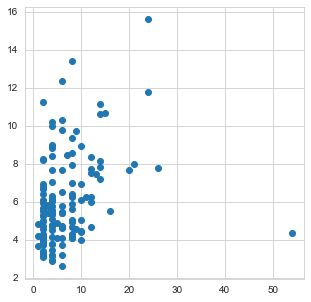

In [51]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.scatter(y_test, y_pred_test)

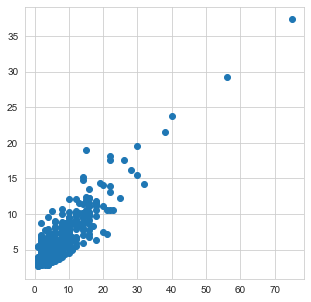

In [52]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.scatter(y_train, y_train_pred)

In [53]:
def abs_pred(X, y, threshold):

    var = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
           'health', 'G1', 'G2', 'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
           'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
           'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes',
           'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes'
          ]
    
    X['y_pred_proba_m1'] = svclassifier.predict_proba(X[var])[:,1]
    X['threshold']= X.y_pred_proba_m1.map(lambda x: 1 if x > threshold else 0)
    
    X1 = X[(X['threshold'] <= 0 )]
    X2 = X[(X['threshold'] > 0 )] 
    
    X1['y_pred_m2'] = 0
    X2['y_pred_m2'] = xgb_model_df1.predict(X2[var])    
    
    X_final = pd.concat([X1, X2],axis = 0)
    X_final.reset_index(drop=True, inplace=True)

    rmse  = metrics.mean_squared_error(y, X_final.y_pred_m2, squared=False)
      
    print('RMSE: ', rmse)

In [54]:
num = [float(x)/100 for x in range(20,80,5)]
#
for i in num:
    print('Theshold: ', i)
    abs_pred(X_train, y_train, i)
    

Theshold:  0.2
RMSE:  4.0072401604717625
Theshold:  0.25
RMSE:  4.0072401604717625
Theshold:  0.3
RMSE:  4.0072401604717625
Theshold:  0.35
RMSE:  4.0072401604717625
Theshold:  0.4
RMSE:  4.0072401604717625
Theshold:  0.45
RMSE:  7.182725792678856
Theshold:  0.5
RMSE:  7.547580785635775
Theshold:  0.55
RMSE:  7.83035958207459
Theshold:  0.6
RMSE:  7.858335054835415
Theshold:  0.65
RMSE:  8.411557437828872
Theshold:  0.7
RMSE:  8.59579066163832
Theshold:  0.75
RMSE:  9.105007574933282


In [55]:
num = [float(x)/100 for x in range(20,80,5)]
#
for i in num:
    print('Theshold: ', i)
    abs_pred(X_test, y_test, i)
    

Theshold:  0.2
RMSE:  6.023983771481206
Theshold:  0.25
RMSE:  6.023983771481206
Theshold:  0.3
RMSE:  6.023983771481206
Theshold:  0.35
RMSE:  6.023983771481206
Theshold:  0.4
RMSE:  6.023983771481206
Theshold:  0.45
RMSE:  6.023983771481206
Theshold:  0.5
RMSE:  6.226070920236665
Theshold:  0.55
RMSE:  7.179817731238887
Theshold:  0.6
RMSE:  7.425275885036875
Theshold:  0.65
RMSE:  8.008882362375097
Theshold:  0.7
RMSE:  8.579238282008292
Theshold:  0.75
RMSE:  8.8664981978964


In [56]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(svclassifier, 'svclassifier.pkl')
joblib.dump(xgb_model_df1, 'xgb_model_df1.pkl')

['xgb_model_df1.pkl']